# K-Means Clustering on a Multi-Class and Multi-Label Data Set Monte-Carlo

### Sitao Min

### Monte Carlo Simulation of K-Means

In [263]:
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances

def train_kmeans(X_train_kmeans,y_train_family,y_train_genus,y_train_species,i):
    results = []
    k_list = [2,3,4,5,6,7,8,9,10,20,50]
    y_train_kmeans =  X_train_kmeans = data2.iloc[:,-4]
    X_train_kmeans = data2.iloc[:,0:-4]
    for k in k_list:
        kmeans_model = cluster.KMeans(init = 'random',n_clusters=k, random_state=i).fit(X_train_kmeans)
        labels = kmeans_model.labels_
        CH_index = metrics.calinski_harabaz_score(X_train_kmeans, labels)
        results.append(CH_index)

    for index,ele in enumerate(results):
        if ele == max(results):
            best_k = k_list[index]
    kmeans_model = cluster.KMeans(init = 'random',n_clusters=best_k, random_state=i).fit(X_train_kmeans)
    labels = kmeans_model.labels_
    CH_index = metrics.calinski_harabaz_score(X_train_kmeans, labels)
    print('round %d best k: %d CH_index:%f'%(i,best_k,CH_index))
    
    y_pred_family = determine_majority(y_train_family,labels,best_k)
    y_pred_genus = determine_majority(y_train_genus,labels,best_k)
    y_pred_species = determine_majority(y_train_species,labels,best_k)
    y_train3 = pd.DataFrame(np.zeros((len(labels),3)))
    y_pred3 = pd.DataFrame(np.zeros((len(labels),3)))
    y_train3.iloc[:,0] = y_train_family
    y_train3.iloc[:,1] = y_train_genus
    y_train3.iloc[:,2] = y_train_species
    y_pred3.iloc[:,0] = y_pred_family
    y_pred3.iloc[:,1] = y_pred_genus
    y_pred3.iloc[:,2] = y_pred_species
    hamming_loss_kmeans = np.sum(np.not_equal(y_train3.values, y_pred3.values))/float(y_train3.values.size)
    print('hamming_loss_kmeans:',hamming_loss_kmeans)
    
    return hamming_loss_kmeans

In [264]:
X_train_kmeans = data2.iloc[:,0:-4]
y_train_family =  data2.iloc[:,-4]
y_train_genus =  data2.iloc[:,-3]
y_train_species =  data2.iloc[:,-2]

In [266]:
hamming_list = pd.DataFrame(np.ones((50,1)))
for i in range(0,50):
    hamming_ls = train_kmeans(X_train_kmeans,y_train_family,y_train_genus,y_train_species,i)
    hamming_list.iloc[i,0] = hamming_ls

print(hamming_list.mean(),hamming_list.std())

round 0 best k: 2 CH_index:3680.741349
hamming_loss_kmeans: 0.2985406532314107
round 1 best k: 2 CH_index:3680.741349
hamming_loss_kmeans: 0.2985406532314107
round 2 best k: 2 CH_index:3680.741349
hamming_loss_kmeans: 0.2985406532314107
round 3 best k: 2 CH_index:3680.741349
hamming_loss_kmeans: 0.2985406532314107
round 4 best k: 2 CH_index:3680.741349
hamming_loss_kmeans: 0.2985406532314107
round 5 best k: 2 CH_index:3680.741349
hamming_loss_kmeans: 0.2985406532314107
round 6 best k: 2 CH_index:3680.741349
hamming_loss_kmeans: 0.2985406532314107
round 7 best k: 2 CH_index:3680.741349
hamming_loss_kmeans: 0.2985406532314107
round 8 best k: 2 CH_index:3680.741349
hamming_loss_kmeans: 0.2985406532314107
round 9 best k: 2 CH_index:3680.741349
hamming_loss_kmeans: 0.2985406532314107
round 10 best k: 2 CH_index:3680.741349
hamming_loss_kmeans: 0.2985406532314107
round 11 best k: 2 CH_index:3680.741349
hamming_loss_kmeans: 0.2985406532314107
round 12 best k: 2 CH_index:3680.741349
hamming_lo

In [267]:
print('hamming distance mean:', hamming_list.mean())
print('hamming dsitance std:',hamming_list.std())

hamming distance mean: 0    0.298541
dtype: float64
hamming dsitance std: 0    5.607473e-17
dtype: float64


### (a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k automatically based on CH Index

In [198]:
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances


results = []
start = time.time()
k_list = [2,3,4,5,6,7,8,9,10,20,50]
for k in k_list:
    kmeans_model = cluster.KMeans(n_clusters=k, random_state=0).fit(X_train_kmeans)
    labels = kmeans_model.labels_
    CH_index = metrics.calinski_harabaz_score(X_train_kmeans, labels)
    results.append(CH_index)

print(time.time()-start)

for index,ele in enumerate(results):
    if ele == max(results):
        best_k = k_list[index]
print('best k:', best_k) 
kmeans_model = cluster.KMeans(n_clusters=best_k, random_state=0).fit(X_train_kmeans)
labels = kmeans_model.labels_
CH_index = metrics.calinski_harabaz_score(X_train_kmeans, labels)
print('CH index:',CH_index)

6.4738240242004395
best k: 2
CH index: 3680.7413494630937


best k: 2


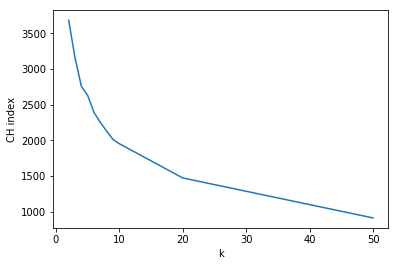

In [199]:
for index,ele in enumerate(results):
    if ele == max(results):
        best_k = k_list[index]
print('best k:', best_k)  
k_list = [2,3,4,5,6,7,8,9,10,20,50]
plt.plot(k_list, results)
plt.ylabel('CH index')
plt.xlabel('k')
plt.show()

### (b) Determine the majority by reading the true labels.

In [200]:
def determine_majority(y_train_label,labels,k):
    family_cluster = pd.DataFrame(np.ones((y_train_kmeans.shape[0],3)),columns = ['col1','col2','col3'])
    family_cluster.iloc[:,0] = y_train_label
    family_cluster.iloc[:,1] = labels
    for i in range(0,k):
        cluster = family_cluster[family_cluster['col2'] == i]
        majority = cluster['col1'].mode()[0]
        cluster_value = family_cluster[family_cluster['col2'] == i]
        family_cluster.loc[cluster_value.index.values,'col3'] = majority
    y_family = family_cluster['col3']
    return y_family

In [202]:
y_train_family =  data2.iloc[:,-4]
y_train_genus =  data2.iloc[:,-3]
y_train_species =  data2.iloc[:,-2]
y_pred_family = determine_majority(y_train_family,labels,best_k)
y_pred_genus = determine_majority(y_train_genus,labels,best_k)
y_pred_species = determine_majority(y_train_species,labels,best_k)

In [203]:
y_pred_family

0               Hylidae
1               Hylidae
2               Hylidae
3               Hylidae
4               Hylidae
5               Hylidae
6               Hylidae
7               Hylidae
8               Hylidae
9               Hylidae
10              Hylidae
11              Hylidae
12              Hylidae
13              Hylidae
14              Hylidae
15              Hylidae
16              Hylidae
17              Hylidae
18              Hylidae
19              Hylidae
20              Hylidae
21              Hylidae
22              Hylidae
23              Hylidae
24              Hylidae
25              Hylidae
26              Hylidae
27              Hylidae
28              Hylidae
29              Hylidae
             ...       
7165            Hylidae
7166            Hylidae
7167    Leptodactylidae
7168            Hylidae
7169            Hylidae
7170            Hylidae
7171            Hylidae
7172            Hylidae
7173            Hylidae
7174            Hylidae
7175            

In [204]:
y_pred_genus

0       Hypsiboas
1       Hypsiboas
2       Hypsiboas
3       Hypsiboas
4       Hypsiboas
5       Hypsiboas
6       Hypsiboas
7       Hypsiboas
8       Hypsiboas
9       Hypsiboas
10      Hypsiboas
11      Hypsiboas
12      Hypsiboas
13      Hypsiboas
14      Hypsiboas
15      Hypsiboas
16      Hypsiboas
17      Hypsiboas
18      Hypsiboas
19      Hypsiboas
20      Hypsiboas
21      Hypsiboas
22      Hypsiboas
23      Hypsiboas
24      Hypsiboas
25      Hypsiboas
26      Hypsiboas
27      Hypsiboas
28      Hypsiboas
29      Hypsiboas
          ...    
7165    Hypsiboas
7166    Hypsiboas
7167    Adenomera
7168    Hypsiboas
7169    Hypsiboas
7170    Hypsiboas
7171    Hypsiboas
7172    Hypsiboas
7173    Hypsiboas
7174    Hypsiboas
7175    Hypsiboas
7176    Hypsiboas
7177    Hypsiboas
7178    Hypsiboas
7179    Hypsiboas
7180    Hypsiboas
7181    Hypsiboas
7182    Hypsiboas
7183    Hypsiboas
7184    Hypsiboas
7185    Hypsiboas
7186    Hypsiboas
7187    Hypsiboas
7188    Hypsiboas
7189    Hy

In [205]:
y_pred_species

0            HypsiboasCordobae
1            HypsiboasCordobae
2            HypsiboasCordobae
3            HypsiboasCordobae
4            HypsiboasCordobae
5            HypsiboasCordobae
6            HypsiboasCordobae
7            HypsiboasCordobae
8            HypsiboasCordobae
9            HypsiboasCordobae
10           HypsiboasCordobae
11           HypsiboasCordobae
12           HypsiboasCordobae
13           HypsiboasCordobae
14           HypsiboasCordobae
15           HypsiboasCordobae
16           HypsiboasCordobae
17           HypsiboasCordobae
18           HypsiboasCordobae
19           HypsiboasCordobae
20           HypsiboasCordobae
21           HypsiboasCordobae
22           HypsiboasCordobae
23           HypsiboasCordobae
24           HypsiboasCordobae
25           HypsiboasCordobae
26           HypsiboasCordobae
27           HypsiboasCordobae
28           HypsiboasCordobae
29           HypsiboasCordobae
                 ...          
7165         HypsiboasCordobae
7166    

### (c) Calculate the average Hamming distance (score) between the true labels and the labels assigned by clusters.

In [206]:
y_train3 = pd.DataFrame(np.zeros((len(labels),3)))
y_pred3 = pd.DataFrame(np.zeros((len(labels),3)))
y_train3.iloc[:,0] = y_train_family
y_train3.iloc[:,1] = y_train_genus
y_train3.iloc[:,2] = y_train_species
y_pred3.iloc[:,0] = y_pred_family
y_pred3.iloc[:,1] = y_pred_genus
y_pred3.iloc[:,2] = y_pred_species
hamming_loss_kmeans = np.sum(np.not_equal(y_train3.values, y_pred3.values))/float(y_train3.values.size)
print('hamming_loss_kmeans:',hamming_loss_kmeans)

hamming_loss_kmeans: 0.2985406532314107
